In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("BlackFriday.csv")

In [18]:
del df['Product_Category_2']
del df['Product_Category_3']
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [19]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [20]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<Axes: title={'center': 'Purchase Distribution by age'}, xlabel='Age'>

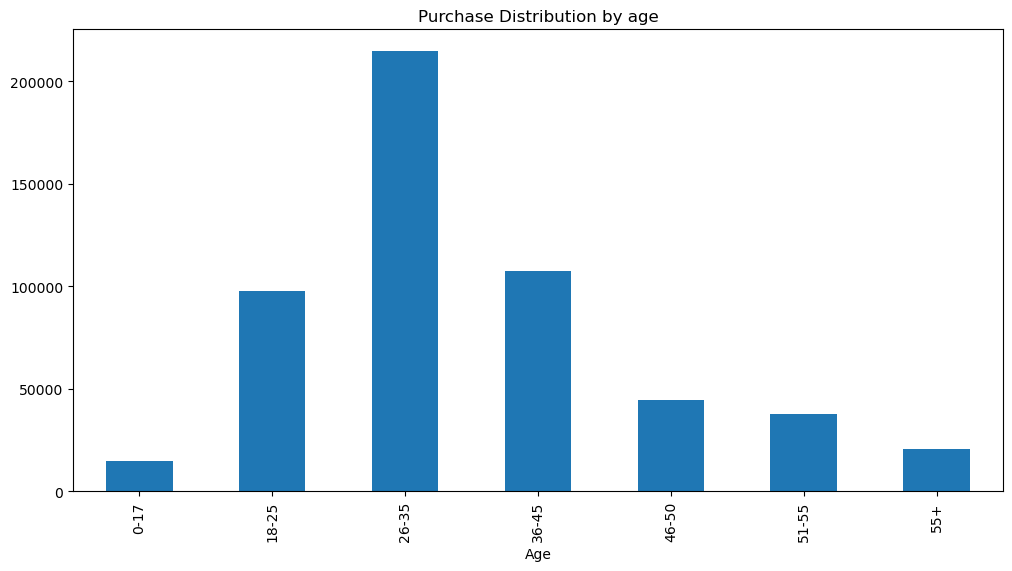

In [21]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12, 6),title = 'Purchase Distribution by age')

In [22]:
#So from here we conclude that age group 26-35  buys more....
#so we can analyze which section to target and how run the ads on specific social media platform....

In [23]:
for i in df['Age'].unique():
    print(i)

0-17
55+
26-35
46-50
51-55
36-45
18-25


In [24]:
len(df[df['Age'] == '0-17'])

14707

In [25]:
lst = []
for i in df['Age'].unique():
    lst.append([i , df[df['Age'] == i]['Product_ID'].nunique()])
data = pd.DataFrame(lst,  columns = ['Age' , 'Products'])
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


In [26]:
df[df['Age'] == i]['Product_ID'].nunique()

3213

<Axes: xlabel='Age'>

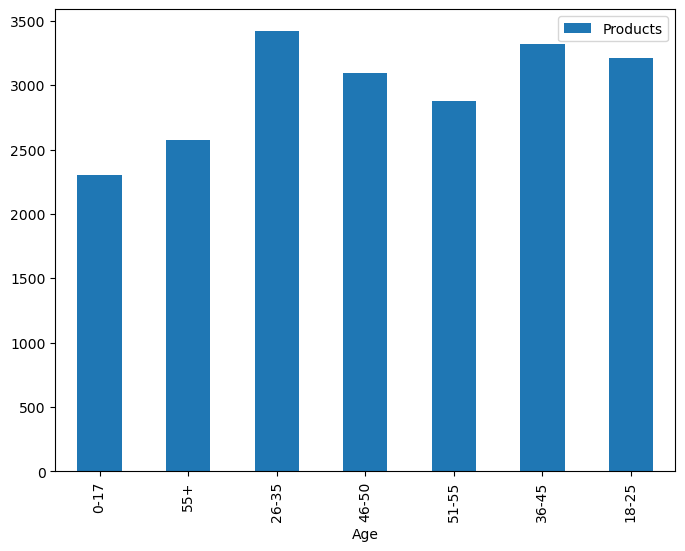

In [27]:
data.plot.bar(x = 'Age', figsize = (8 , 6))

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

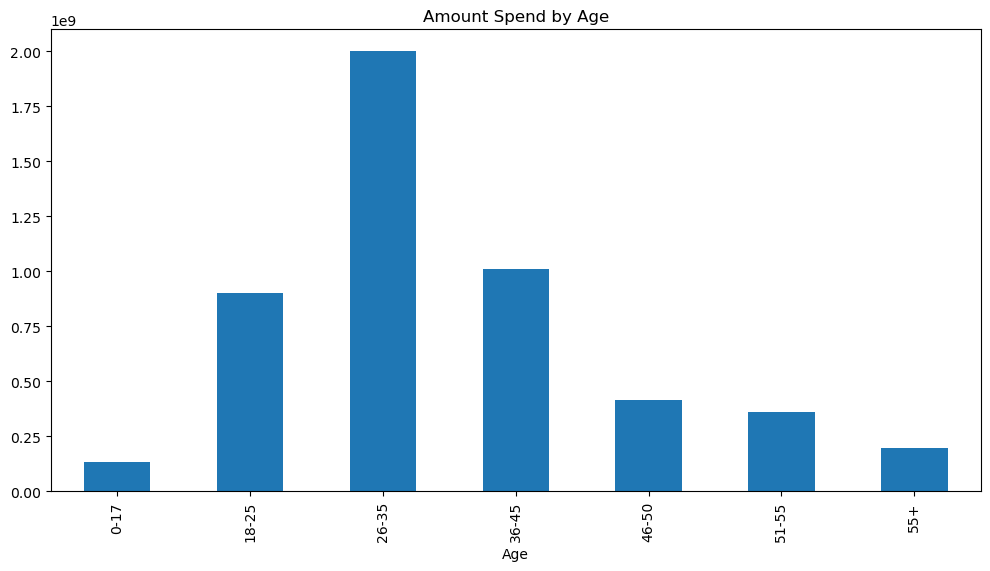

In [28]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar' , figsize = (12, 6), title = "Amount Spend by Age")

In [29]:
df['Purchase'] = df['Purchase'].astype(int)

In [30]:
mean_purchase_by_age = df.groupby('Age')['Purchase'].mean()

<Axes: ylabel='Purchase'>

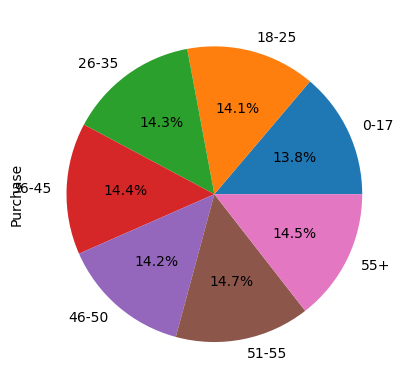

In [31]:
mean_purchase_by_age.plot(kind = 'pie' , autopct = "%0.1f%%")

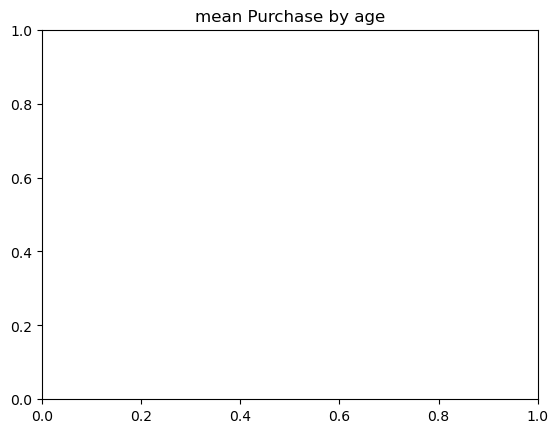

In [33]:
plt.title("mean Purchase by age")
plt.show()

<Axes: >

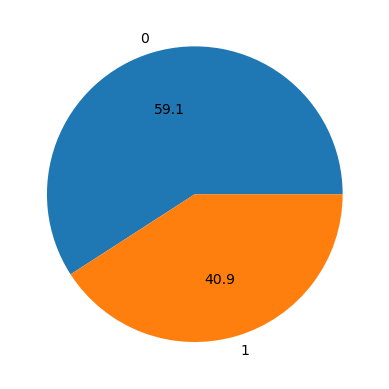

In [35]:
df.groupby('Marital_Status').size().plot(kind = 'pie' , autopct = "%0.1f")